In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data = pd.read_csv('anime.csv')

In [3]:
data.head()

,Title,Production,Episodes,Source,Genre,Airdate,Rating,Voters,Theme
0,Shingeki no Kyojin,Wit Studio,25,Manga,"Action,Drama,Fantasy,Mystery","Apr 7, 2013, 01:58 (JST)",8.52,"3,142,121","Military,Super Power"
1,Fullmetal Alchemist: Brotherhood,Bones,64,Manga,"Action,Adventure,Comedy,Drama,Fantasy","Apr 5, 2009, 17:00 (JST)",9.16,"2,676,911",Military
2,Sword Art Online,A-1 Pictures,25,Light novel,"Action,Adventure,Fantasy,Romance","Jul 8, 2012, 00:00 (JST)",7.20,"2,586,628",Game
3,One Punch Man,Madhouse,12,Web manga,"Action,Comedy,Sci-Fi,Supernatural","Oct 5, 2015, 01:05 (JST)",8.52,"2,583,068","Parody,Super Power"
4,Boku no Hero Academia,Bones,13,Manga,"Action,Comedy","Apr 3, 2016, 17:00 (JST)",7.98,"2,426,309","School,Super Power"


In [4]:
data_1 = data.copy()
data_1.Episodes = data.Episodes.replace('?', '-1').astype("Int64").replace(-1, pd.NA)
data_1.Voters = data_1.Voters.replace('N/A', '-1').str.replace(',', '').astype(int).replace(-1, pd.NA)
categ = [i for i in data_1.columns if i not in {'Episodes', 'Rating', 'Voters'}]
data_1[categ] = data_1[categ].astype('category')
data_1 = data_1.rename(columns={i:i.lower().replace(' ', '_') for i in data_1.columns})

In [5]:
data_1.info()
data_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   title       1992 non-null   category
 1   production  1992 non-null   category
 2   episodes    1939 non-null   Int64   
 3   source      1992 non-null   category
 4   genre       1992 non-null   category
 5   airdate     1020 non-null   category
 6   rating      1944 non-null   float64 
 7   voters      1992 non-null   int32   
 8   theme       1992 non-null   category
dtypes: Int64(1), category(6), float64(1), int32(1)
memory usage: 208.1 KB


,episodes,rating,voters
count,1939.000000,1944.000000,1.992000e+03
mean,14.975245,7.150849,1.643311e+05
std,28.116711,0.709454,3.135926e+05
min,1.000000,2.960000,8.662000e+03
25%,1.000000,6.720000,2.126500e+04
50%,12.000000,7.210000,5.478550e+04
75%,13.000000,7.590000,1.585070e+05
max,500.000000,9.160000,3.142121e+06


C:\Users\bkmz1\anaconda3\envs\manipulator\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


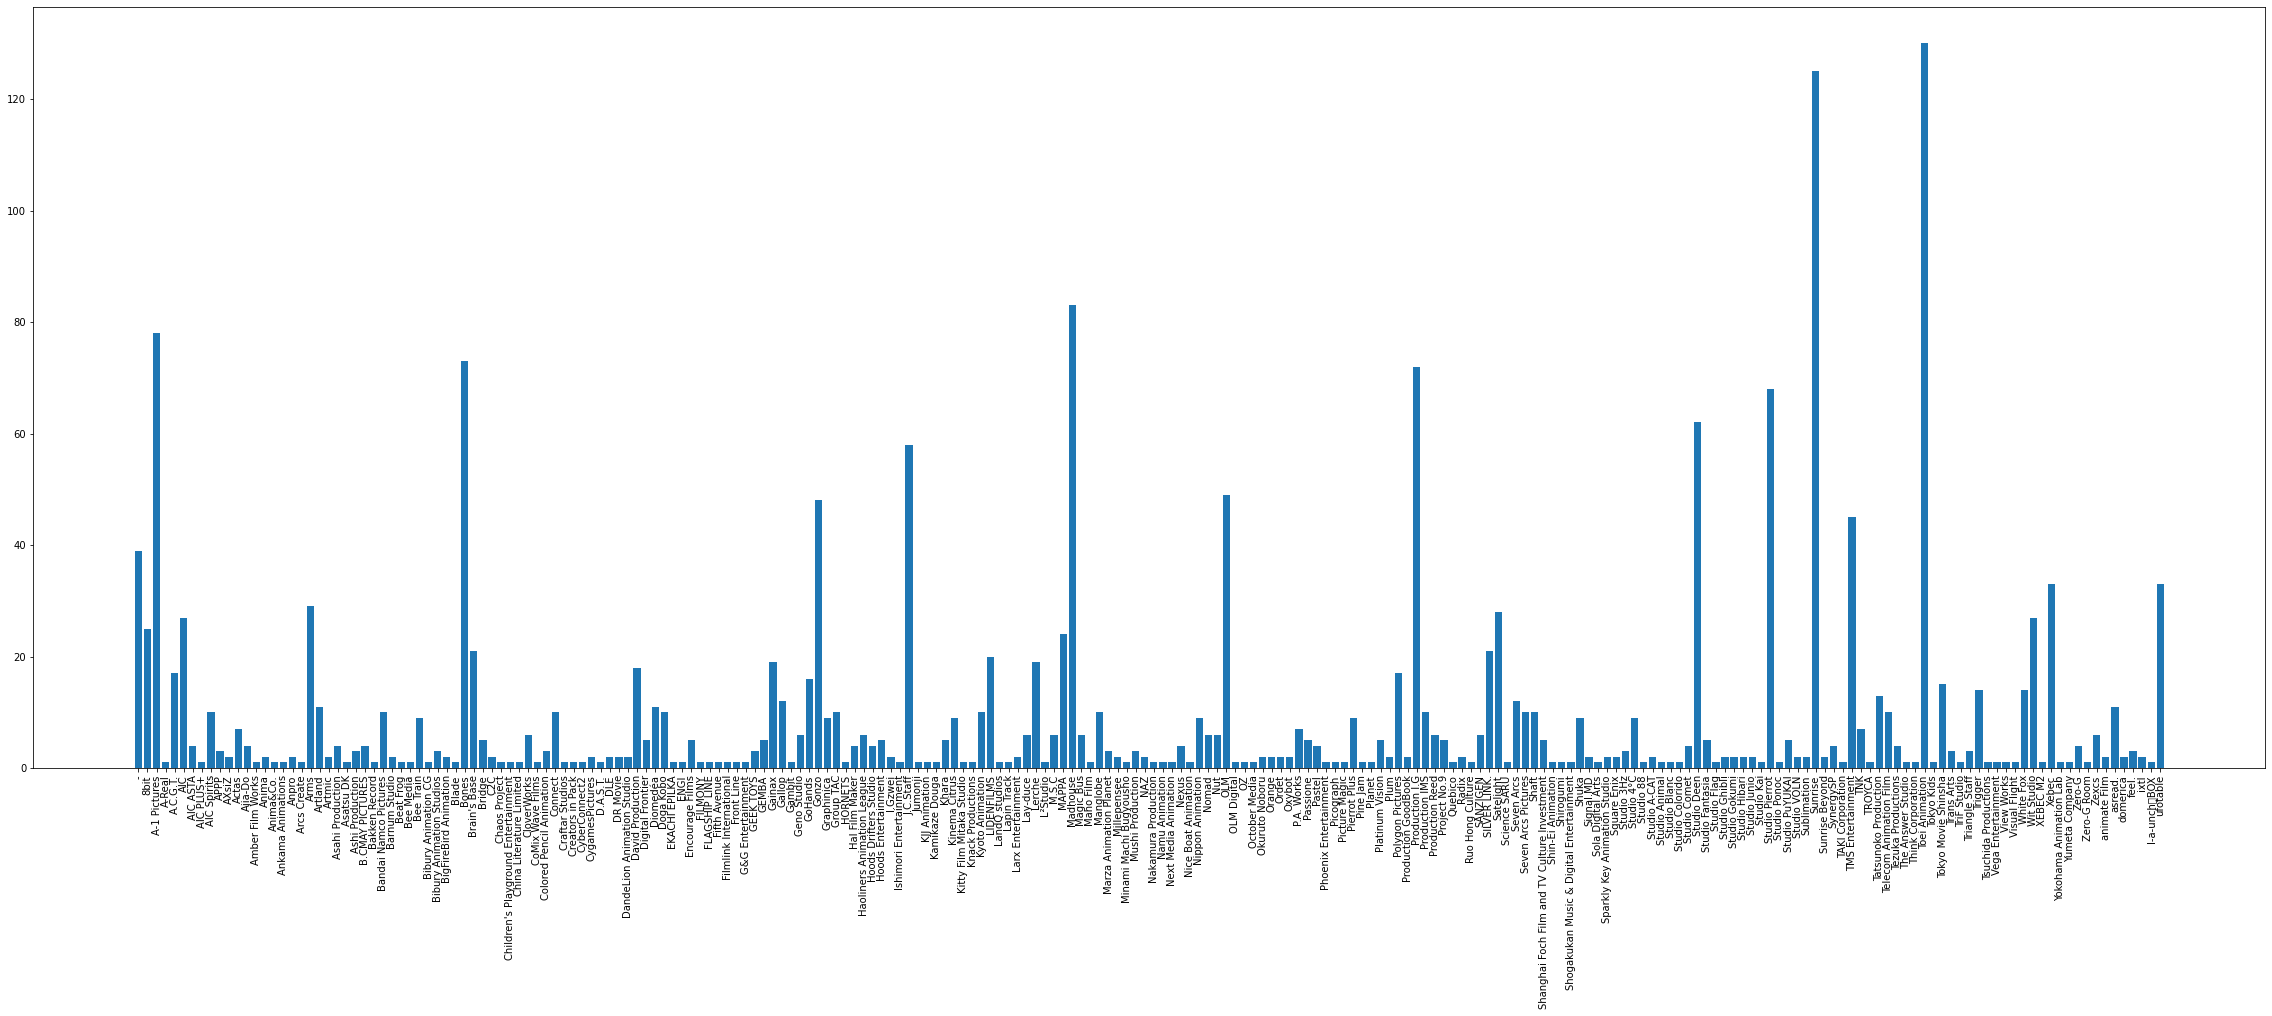

In [6]:
comp = data_1.groupby(['production']).size()
plt.rcParams['figure.figsize'] = [40, 14]
plt.bar(comp.index, comp)
_ = plt.xticks(rotation=90)
_ = plt.tick_params(labelsize=10)

<BarContainer object of 99 artists>

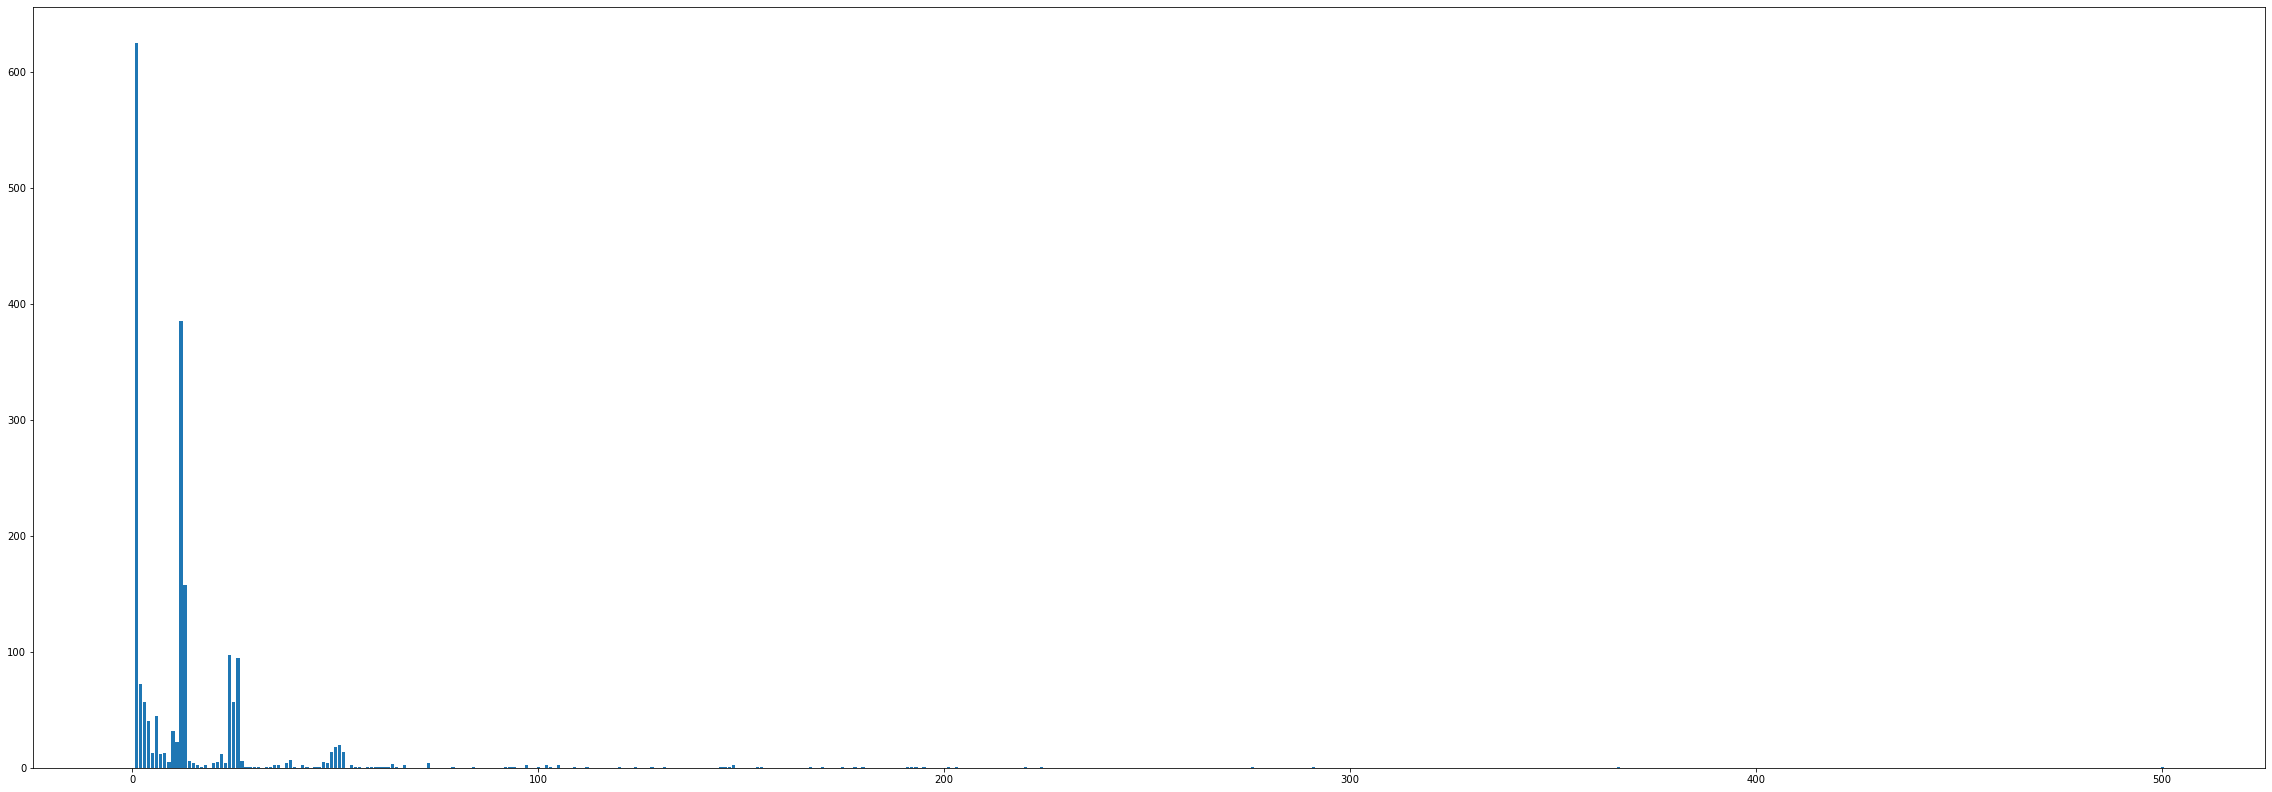

In [7]:
eps = data_1.groupby(['episodes']).size()
plt.bar(eps.index, eps)

In [8]:
src = data_1.groupby(['source']).size()
src.sort_values().iloc[-3:]

source
Light novel    263
Original       468
Manga          818
dtype: int64

In [9]:
themes = pd.Series([i.split(',') for i in list(data_1.theme)]).explode()
themes = themes.groupby(themes).size().sort_values()
themes

bilibili                      1
Warner Bros. Japan            1
Flatiron Film Company         1
Nozomi Entertainment          1
Tokyopop                      1
OLM Digital                   1
Urban Vision                  1
AnimEigo                      1
Anchor Bay Films              1
Netflix                       2
NYAV Post                     2
Geneon Entertainment USA      2
VIZ Media                     2
Maiden Japan                  2
Ponycan USA                   3
Josei                         3
GKIDS                         3
Manga Entertainment           3
Shout! Factory                4
Bandai Entertainment          5
Media Blasters                7
Central Park Media            7
ADV Films                    11
Crunchyroll                  11
Discotek Media               15
Cars                         16
Shoujo                       19
Music                        28
Sentai Filmworks             40
Kids                         43
Parody                       45
Aniplex 

In [13]:
data_1.head()

,title,production,episodes,source,genre,airdate,rating,voters,theme
0,Shingeki no Kyojin,Wit Studio,25,Manga,"Action,Drama,Fantasy,Mystery","Apr 7, 2013, 01:58 (JST)",8.52,3142121,"Military,Super Power"
1,Fullmetal Alchemist: Brotherhood,Bones,64,Manga,"Action,Adventure,Comedy,Drama,Fantasy","Apr 5, 2009, 17:00 (JST)",9.16,2676911,Military
2,Sword Art Online,A-1 Pictures,25,Light novel,"Action,Adventure,Fantasy,Romance","Jul 8, 2012, 00:00 (JST)",7.20,2586628,Game
3,One Punch Man,Madhouse,12,Web manga,"Action,Comedy,Sci-Fi,Supernatural","Oct 5, 2015, 01:05 (JST)",8.52,2583068,"Parody,Super Power"
4,Boku no Hero Academia,Bones,13,Manga,"Action,Comedy","Apr 3, 2016, 17:00 (JST)",7.98,2426309,"School,Super Power"


<AxesSubplot:ylabel='airdate'>

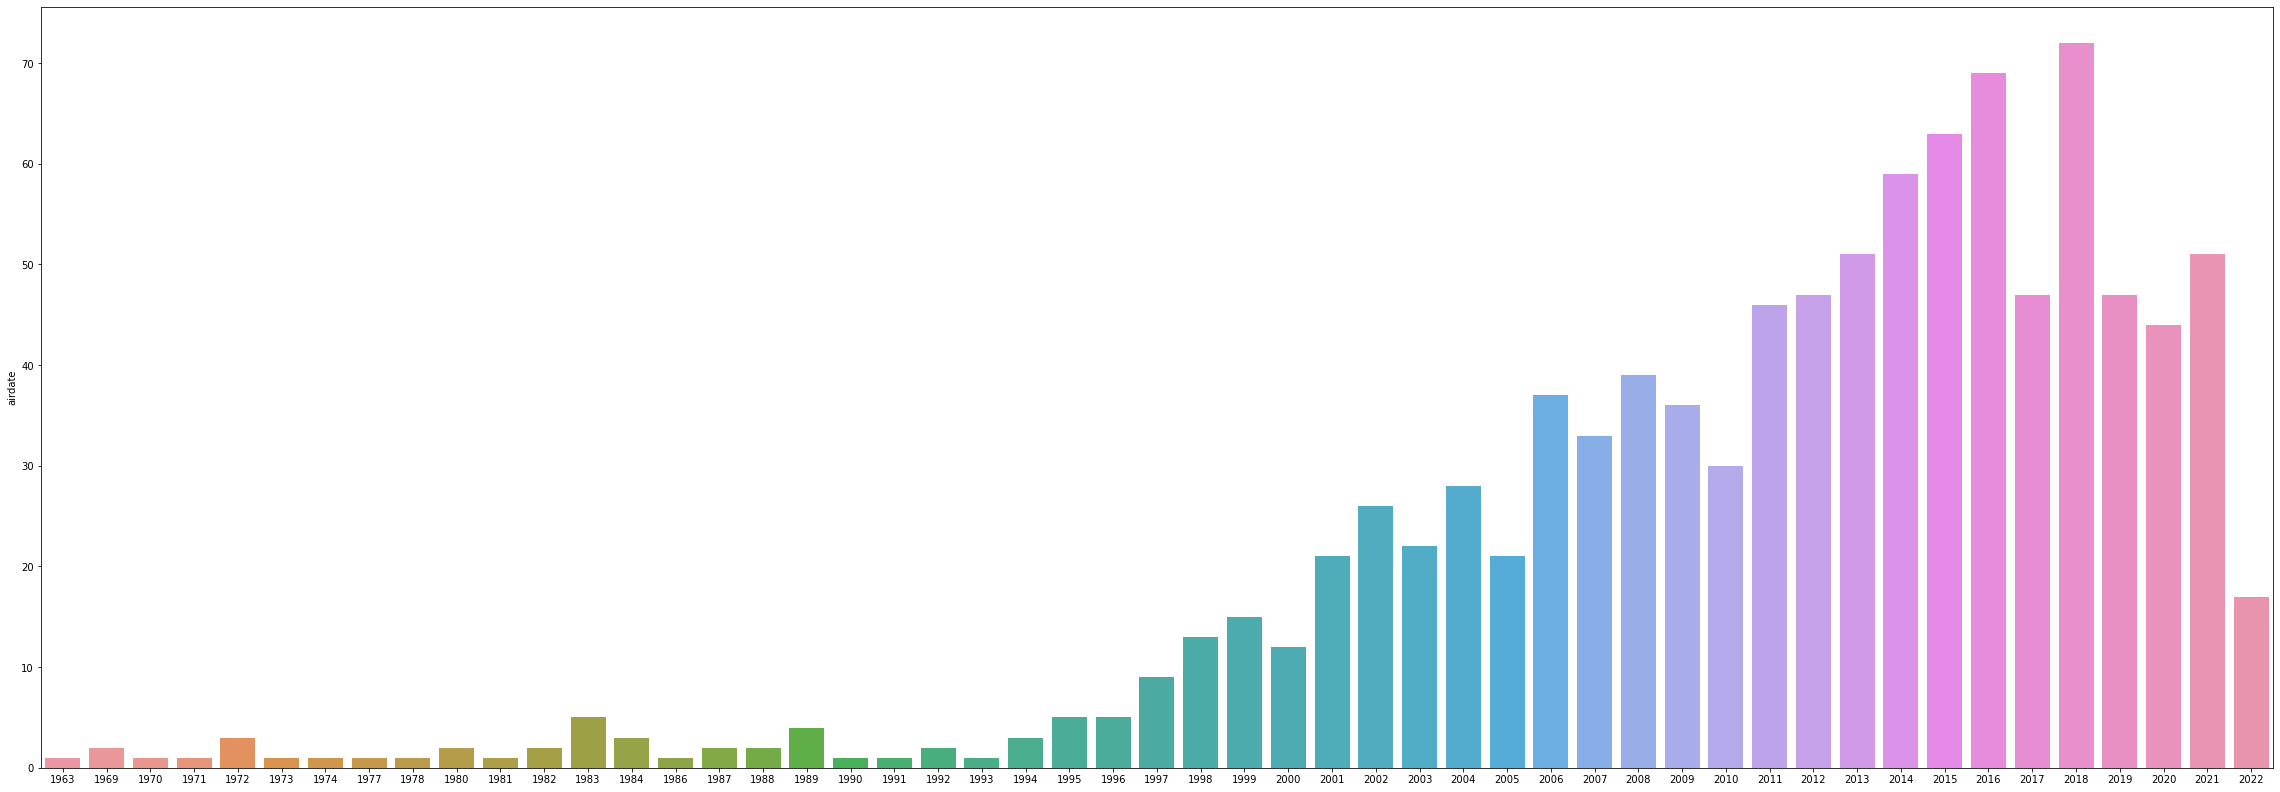

In [88]:
import re
def find_year(s):
    if (r := re.search(r'\d{4}', s)):
        return r.group(0)
years = data_1.airdate.apply(find_year).value_counts().sort_index()
sns.barplot(x=years.index, y=years, order=years.index)

C:\Users\bkmz1\anaconda3\envs\manipulator\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


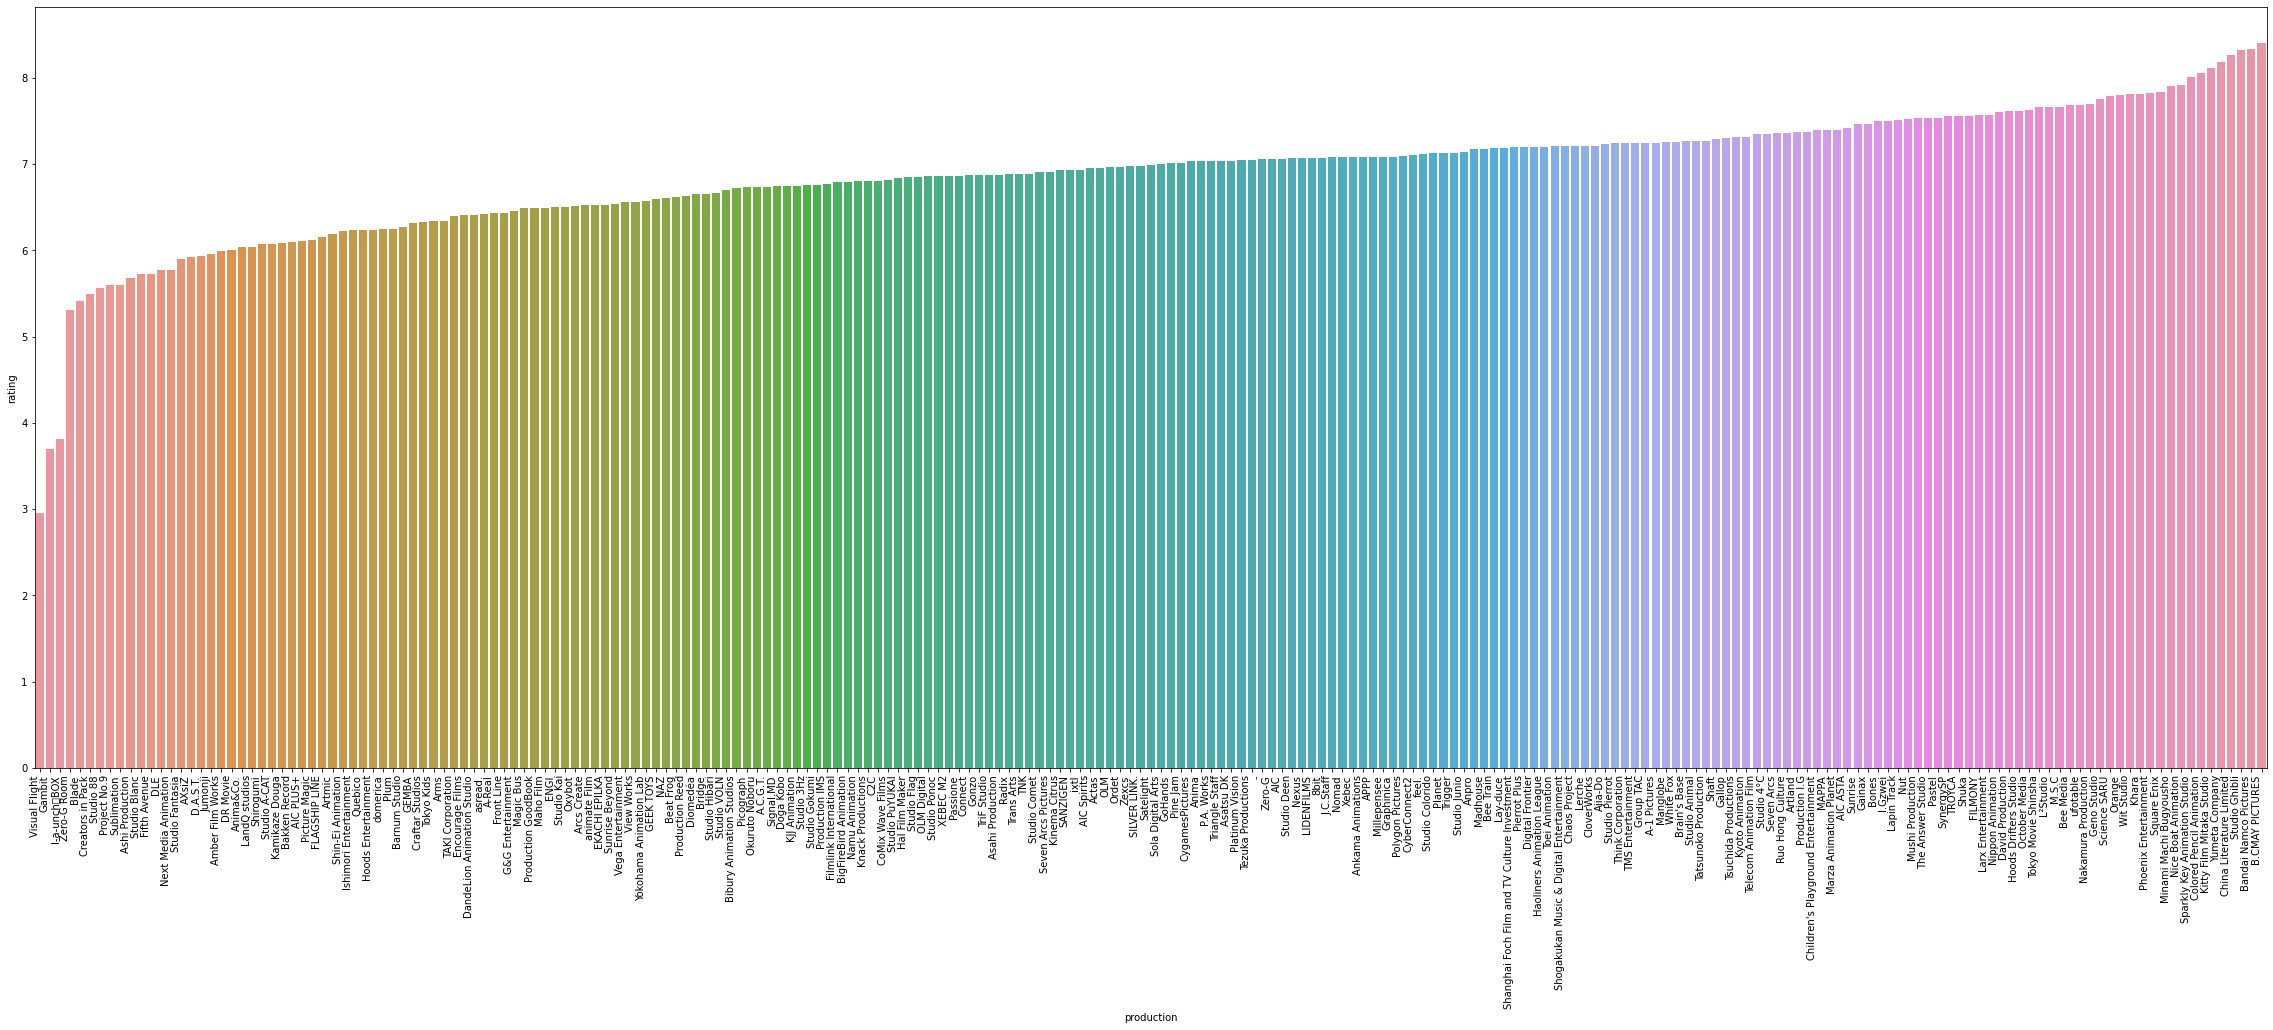

In [71]:
ratings = data_1.groupby(['production'])['rating'].mean().sort_values().dropna()
ax = sns.barplot(x=ratings.index, y=ratings, order=ratings.index)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

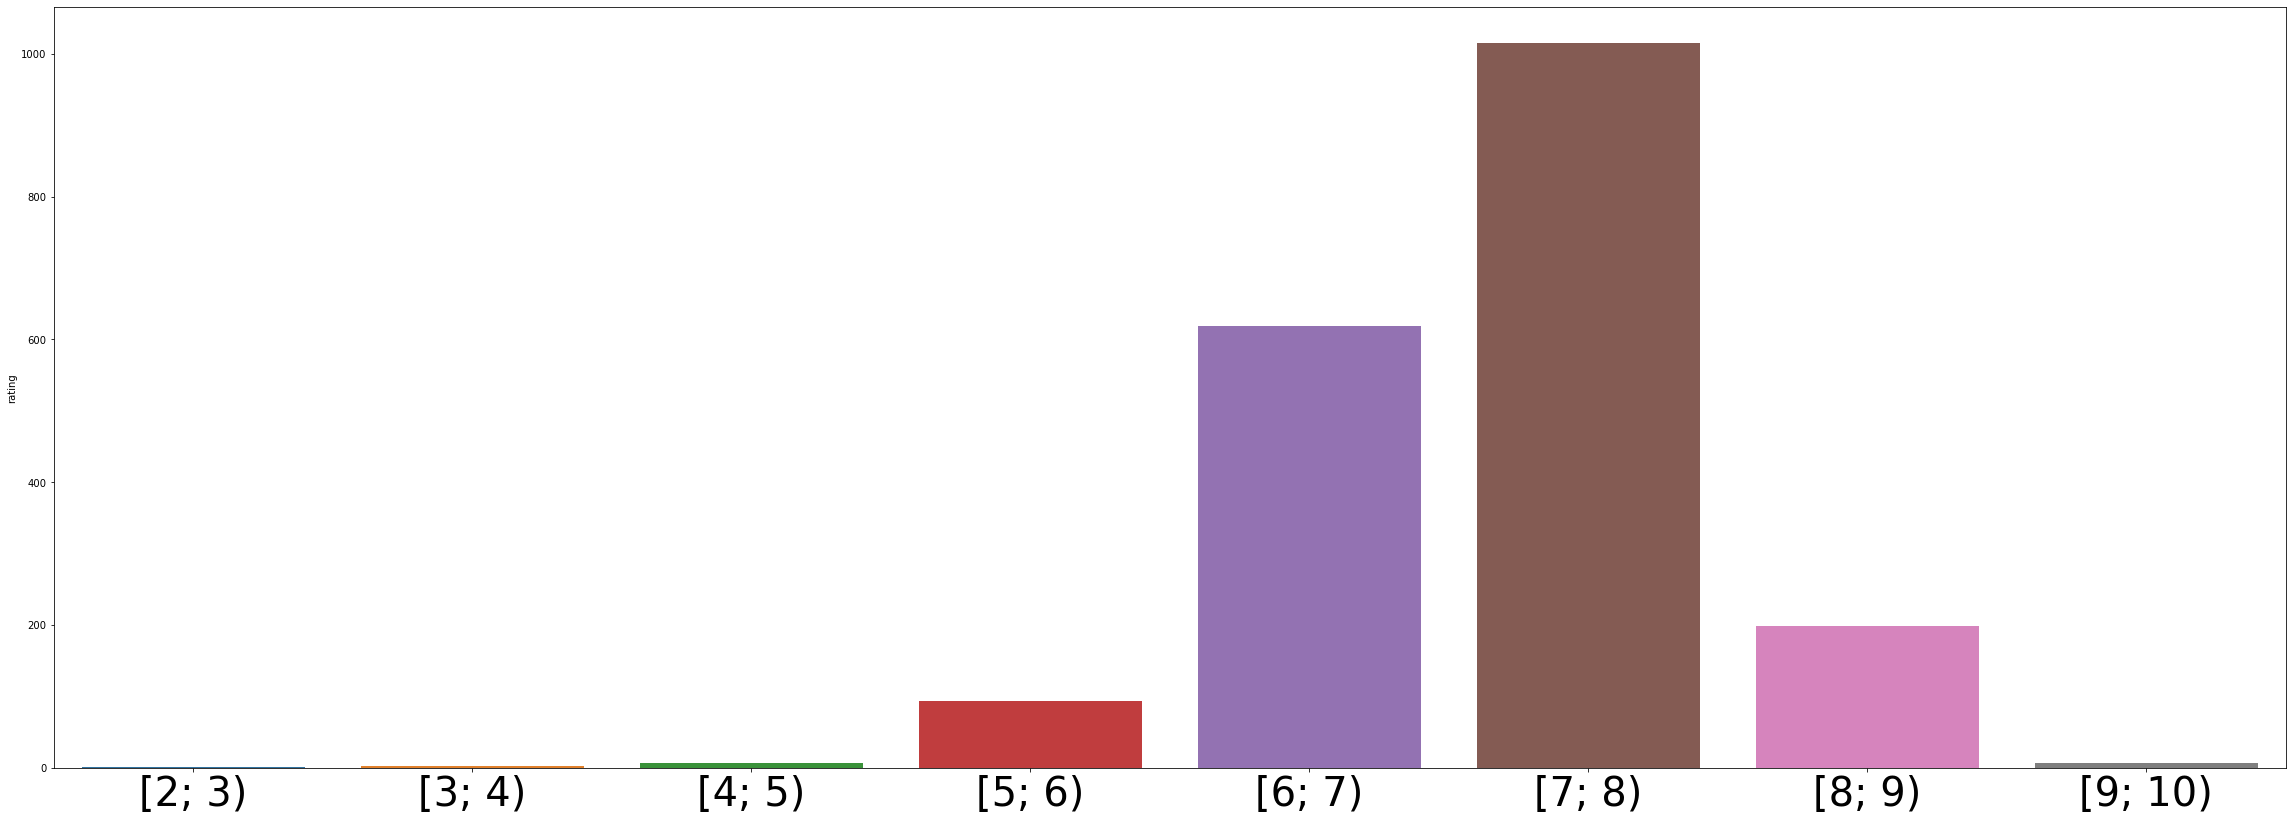

In [86]:
ratings = data_1.rating.dropna().apply(int).value_counts().sort_index().rename(lambda t: f'[{t}; {t+1})')
ax = sns.barplot(x=ratings.index, y=ratings, order=ratings.index)
_ = ax.set_xticklabels(ax.get_xticklabels(), fontsize=40)

In [99]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   title       1992 non-null   category
 1   production  1992 non-null   category
 2   episodes    1939 non-null   Int64   
 3   source      1992 non-null   category
 4   genre       1992 non-null   category
 5   airdate     1020 non-null   category
 6   rating      1944 non-null   float64 
 7   voters      1992 non-null   int32   
 8   theme       1992 non-null   category
dtypes: Int64(1), category(6), float64(1), int32(1)
memory usage: 208.1 KB


In [100]:
vec = CountVectorizer()
vec.fit_transform(data_1.genre)
vec.get_feature_names_out()

array(['action', 'adventure', 'avant', 'boys', 'comedy', 'drama', 'ecchi',
       'fantasy', 'fi', 'garde', 'girls', 'gourmet', 'horror', 'life',
       'love', 'mystery', 'of', 'romance', 'sci', 'slice', 'sports',
       'supernatural', 'suspense', 'work'], dtype=object)